In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.shape

(569, 33)

In [9]:
# Deleting the id and Unnamed: 32 columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.shape

(569, 31)

In [10]:
# Dealing With The Outliers
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,13.519822,18.594778,87.363021,586.938407,0.093941,0.086810,0.062108,0.037804,0.174981,0.061224,...,15.276829,24.808290,99.807939,753.006323,0.128976,0.207168,0.209125,0.097371,0.278044,0.079029
std,2.746168,3.926129,18.622502,251.365868,0.012244,0.034808,0.050773,0.027837,0.021885,0.005053,...,3.569692,5.652044,24.268222,372.056673,0.019843,0.101980,0.141360,0.051527,0.042935,0.011726
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.171200,0.055210
25%,11.665000,15.790000,74.720000,416.700000,0.084790,0.059735,0.025590,0.018690,0.159600,0.057250,...,12.975000,20.535000,83.715000,513.500000,0.114350,0.134800,0.097890,0.061315,0.247200,0.070210
50%,13.030000,18.240000,84.070000,520.200000,0.093450,0.079520,0.045680,0.028640,0.173500,0.060820,...,14.380000,24.640000,93.850000,630.500000,0.128900,0.188000,0.181000,0.085420,0.274700,0.077730
75%,14.835000,20.975000,96.170000,674.650000,0.102300,0.109950,0.086975,0.053725,0.189400,0.064160,...,16.765000,28.455000,112.000000,861.750000,0.141850,0.263900,0.307000,0.133700,0.306400,0.085510
max,21.370000,30.720000,141.300000,1386.000000,0.129100,0.202200,0.254500,0.132200,0.254000,0.078180,...,25.370000,41.610000,166.800000,1956.000000,0.190900,0.560900,0.639900,0.254300,0.412800,0.115100


In [12]:
df.shape

(427, 31)

## Preprocessing The Data

In [13]:
# Scaling The Numerical Columns Using The MinMax Scaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
# Encoding The Target Column Using Label Encoder
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

## Splitting The Data

In [15]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

## Building The Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_dim=30),
    
    Dense(8, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\aryaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5620 - loss: 0.6998 - val_accuracy: 0.6957 - val_loss: 0.6833
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7269 - loss: 0.6745 - val_accuracy: 0.7681 - val_loss: 0.6604
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7650 - loss: 0.6477 - val_accuracy: 0.7681 - val_loss: 0.6379
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7076 - loss: 0.6457 - val_accuracy: 0.7681 - val_loss: 0.6152
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7288 - loss: 0.6141 - val_accuracy: 0.7681 - val_loss: 0.5832
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7422 - loss: 0.5838 - val_accuracy: 0.7681 - val_loss: 0.5445
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7541 - loss: 0.5373 - val_accuracy: 0.7681 - val_loss: 0.5133
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7034 - loss: 0.5539 - val_accuracy: 0.7681 - val_loss: 0.4888

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 0.0636 - val_accuracy: 1.0000 - val_loss: 0.0465
Epoch 104/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9440 - loss: 0.0969 - val_accuracy: 1.0000 - val_loss: 0.0381
Epoch 105/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 106/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9736 - loss: 0.0747 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 107/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9639 - loss: 0.0848 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 108/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9692 - loss: 0.0673 - val_accuracy: 1.0000 - val_loss: 0.0364
Epoch 109/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9751 - loss: 0.0803 - val_accuracy: 1.0000 - val_loss: 0.0516
Epoch 110/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9735 - loss: 0.0738 - val_accuracy: 1.0000 - val_loss: 0.039

In [19]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  1],
       [ 3, 19]], dtype=int64)

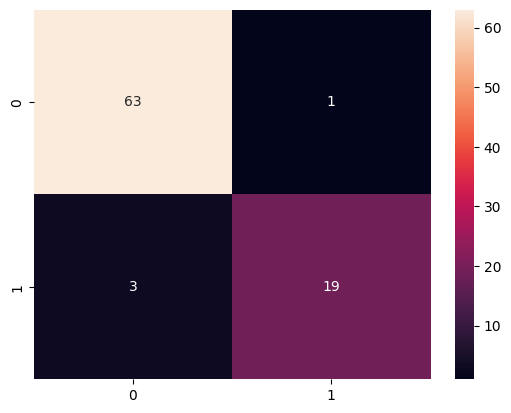

In [21]:
sns.heatmap(cm, annot=True)
plt.show()